*Hess Antoine*
# Project 1

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise
dans l'analyse des désastres maritimes.  Un nouveau client, White Star
Lines, se trouve face à un procès à travers le temps, affaire délicat.
Votre chef vous demande, en tant que seul data scientist chez
CoolCorp, d'analyser les données `*.csv`.  WSL a déjà engagé un expert
pour annoter une partie des données (`test.csv`) avec la survie ou pas
des passagers.

## Intérêt de cette étude
Y a t-il une relation entre la survie des passagers et les différentes données les concernants ?

## Exploration des données
On commence par ouvrir le fichier test.csv avec la librairie **pandas** afin d'en obtenir un dataframe *dfTest* permettant de manipuler les données et de les afficher:

In [14]:
import pandas as pd

#header = 0 pour indiquer la présence de titres pour les colonnes, se trouvant à la première ligne de notre fichier.
dfTrain = pd.read_csv('train.csv', header=0)

On peut commencer par afficher les premières lignes du dataframe, avec la méthode **head()** :

In [15]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On obtient un premier aperçu des données et de leur organisation. Pour rappel :
- **PassengerId** : Le numéro d'embarquement du passager
- **Survived** : Indique si le passager a survécu (1) ou non (0)
- **Pclass** : La classe dans laquelle le passager était enregistré, 1, 2 ou 3.
- **Name** : Nom du passager
- **Sex** : Sexe du passager
- **Age** : Age du passager
- **SibSp** : Nombre de frères, soeurs épouse/époux du passager
- **Parch** : Nombre de pères/mères
- **Ticket** : Numéro du ticketdu passager
- **Fare** : Prix du ticker du passager
- **Cabin** : Numéro de cabine
- **Embarked** : Lieu d'embarcation



On peut ensuite obtenir quelques données intéréssantes grâce à la méthode **describe** :

In [41]:
dfTrain.describe()
#Une erreur intervient, cela est dû à la présence de valeures nulles pour l'age.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477989,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,21.500000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,26.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000


 - On peut déjà observer qu'il y a un total de 891 passagers et que nous avons bien des **PassengerId** commençant de 1 et se terminant à 891, à priori pas d'erreur (doublons ou manquants). 
 - La personne la plus agée a 80 ans et la moins agée moins de 1 an (l'âge des personnes ayant moins de 1 an sont représentées avec une valeur entre 0 et 1). L'âge moyen des passagers est de 29.67 ans. 
 - La valeur maximum de **SibSp** est de 8, indiquant qu'une personne a embarquée avec 8 frères/soeurs et épouse/époux. C'est une valeur élevée mais pas impossible.
 - Une valeure de 6 pour **Parch** indique qu'un passager à embarqué avec ses 6 Parents/enfants, cette valeure est possible.
 - Le prix le plus élevé du billet payé par un passager est de 512.3292. Cette somme peut paraitre étrange à cause du nombre de décimales ( des centimes de centimes de centimes ...) mais n'est pas abérante, on peut fortement imaginer qu'une suite de luxe se trouve sur le bâteau.
 - On remarque que l'âge de tous les passagers n'a pas été renseigné.

On peut ensuite afficher un petit résumé plus complet sur les données, avec notamment le type des variables grâce à la méthode **info()** :

In [17]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Enfin, on peut utiliser la librairie **pylab** et afficher une visualisation graphique :

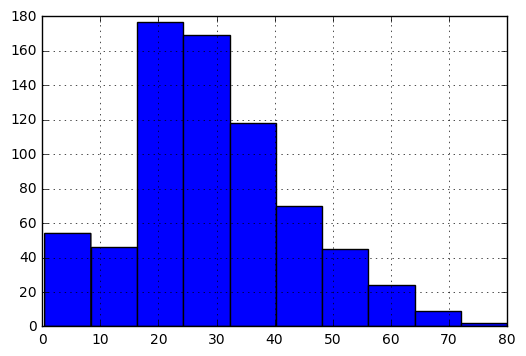

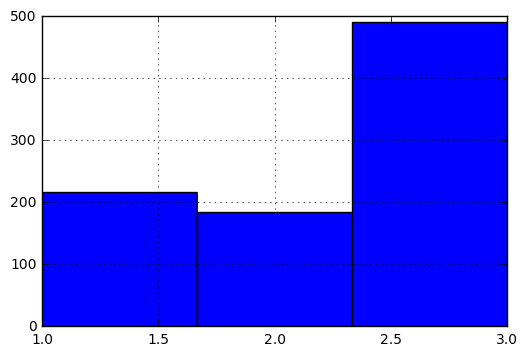

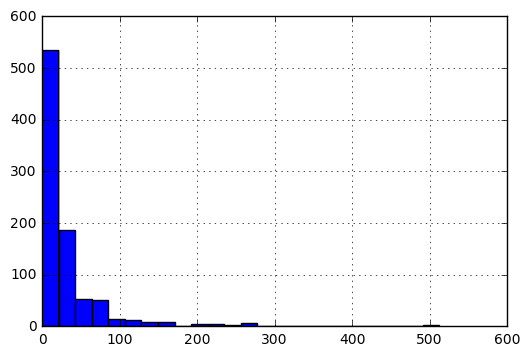

In [43]:
import pylab as p

#Affichage de l'histogramme du nombre de passagers en fonction de leur âge
dfTrain['Age'].hist()
p.show()

#Affichage de l'histogramme du nombre de passagers en fonction de la classe
dfTrain['Pclass'].hist(bins=3, range=(1,3), alpha = 1)
p.show()

#Affichage de l'histogramme du nombre de passagers en fonction du prix du billet
dfTrain['Fare'].hist(bins=24)
p.show()

On remarque qu'une majorité de passagers n'a pas payé son billet. Il peut donc s'agir des membres de l'équipage.

## Néttoyage des données
La première colonne évidente à néttoyer est celle de l'âge. Des valeurs sont à **NaN**. Il faut donc les remplacer par une valeure qui impactera le moins possible les données, à savoir la médiane (Réutilisation du code du notebook *pandas*).

Nous pourrions ajouter cette médiane sur toutes les données **Age** manquante, cependant cette distribution ne serait pas idéale. Nous essayerons avec l'age médian par sexe **et** par classe.

In [34]:
#On ajoute une colonne Gender, plus facilement manipulable avec une variable binaire :
dfTrain['Gender'] = 1
dfTrain['Gender'] = dfTrain['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [36]:
#On importe la librairie numpy
import numpy as np

#On calcul l'âge médian :
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = dfTrain[(dfTrain['Gender'] == i) & \
                              (dfTrain['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

La première ligne de ce tableau correspond à la répartition de l'âge médian des femmes sur la classe, respectivement 1, 2 et 3.
La seconde correspond à celui des hommes.

In [37]:
#On créé une nouvelle colonne qui contiendra l'âge des passagers sans valeure nulle.
#On commence avec une copie :
dfTrain['AgeFill'] = dfTrain['Age']

dfTrain[ dfTrain['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [38]:
#On rempli la nouvelle colonne avec les ages médians correspondants :
for i in range(0, 2):
    for j in range(0, 3):
        dfTrain.loc[ (dfTrain.Age.isnull()) & (dfTrain.Gender == i) & 
                (dfTrain.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
dfTrain[ dfTrain['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [40]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477989,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,21.500000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,26.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000


Notre nouvelle colonne contient bien 891 valeures, c'est parfait !

## Analyse des données
Nous allons maintenant pouvoir créer un modèle avec ces données.

Pour commencer et nous familiariser avec les outils, nous allons observer si il y a une relation entre le prix du billet et l'âge des passagers avec un modèle de régression linéaire. (Ces deux variables sont les seuls utilisables dans un modèle de ce type car ce sont les deux seules variables quantitatives dont nous disposons, or un modèle de régression linéaire ne peut être utiliser qu'avec des variables quantitatives).
La librairie **sklearn** nous aidera a y parvenir :

In [45]:
import matplotlib.pyplot as plt
from sklearn import linear_model

x = dfTrain["AgeFill"]
y = dfTrain["Fare"]

regr = linear_model.LinearRegression()

regr.fit(x,y)

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

C:\Users\hessa\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 891]